In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
initial = pd.read_csv('nba_data_processed.csv')

In [3]:
df = initial.loc[(initial['Player'].duplicated(keep=False) == False)|
                 (initial['Tm'] == 'TOT'), :]
df.rename(columns = {'FT%':'FT','FG%':'FG','3P%':'ThreeP'}, inplace = True)

/var/folders/8z/rbhct03j6clgzny2dgqsbqt80000gn/T/ipykernel_86504/2391590174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'FT%':'FT','FG%':'FG','3P%':'ThreeP'}, inplace = True)


In [4]:
#Is there a correlation between defensive stats and minutes played?

In [5]:
#Pos Anomaly
hybrids = df.loc[df['Pos'].str.contains('-')]
hybrids

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
237,Josh Hart,SF-SG,27.0,TOT,57.0,51.0,32.7,3.7,7.2,0.517,...,0.731,1.8,6.1,7.9,3.8,1.1,0.2,1.5,2.6,10.0
328,Kevin Knox,PF-SF,23.0,TOT,46.0,1.0,13.3,1.8,4.0,0.464,...,0.800,0.5,2.0,2.4,0.3,0.3,0.3,0.7,1.7,5.2
441,Kendrick Nunn,SG-PG,27.0,TOT,52.0,2.0,14.5,2.7,6.5,0.420,...,0.839,0.2,1.3,1.6,1.3,0.4,0.1,0.9,0.9,7.0
605,T.J. Warren,PF-SF,29.0,TOT,28.0,0.0,18.0,3.8,7.3,0.512,...,0.818,0.5,2.3,2.8,1.0,0.6,0.3,0.6,1.6,9.1


In [6]:
#Drop anomalies - inverted boolean series keeps all values which do NOT satisfy.
#subset = df[~df['Pos'].str.contains('-')]
#subset
df['Pos'] = df['Pos'].str.split('-').str[0]
df

/var/folders/8z/rbhct03j6clgzny2dgqsbqt80000gn/T/ipykernel_86504/983242043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pos'] = df['Pos'].str.split('-').str[0]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,McKinley Wright IV,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,Thaddeus Young,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,Trae Young,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,Cody Zeller,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [7]:
grouped = df.groupby('Pos')
grouped

In [8]:
#Do certain positions play more defense or offense? - Totals
defense_means = pd.DataFrame()
new_order = ['PG','SG','SF', 'PF','C']
defense_means = defense_means.reindex(new_order)
defense_means['BLK']= round(grouped['BLK'].mean(),2)
defense_means['STL'] = round(grouped['STL'].mean(),2)
defense_means

,BLK,STL
PG,0.25,0.81
SG,0.23,0.62
SF,0.26,0.62
PF,0.44,0.54
C,0.77,0.46


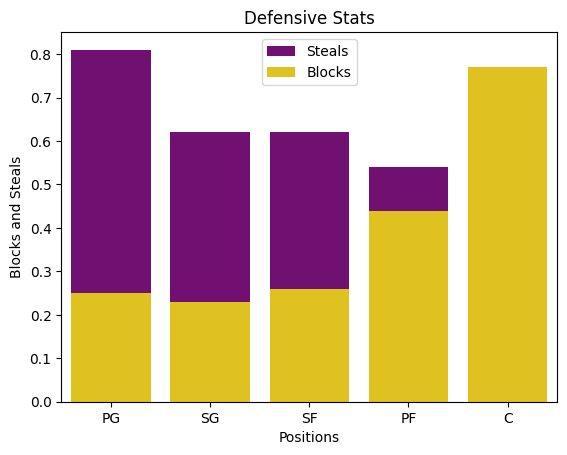

In [9]:
ax = sns.barplot(x=defense_means.index, y=defense_means.STL,color='Purple',label='Steals')
sns.barplot(x=defense_means.index, y=defense_means.BLK,color='Gold',label='Blocks')

plt.title('Defensive Stats')
plt.xlabel('Positions')
plt.ylabel('Blocks and Steals')

ax.legend()
sns.move_legend(ax, 'upper center')

plt.show()

In [10]:
#Do certain positions play more defense or offense? - Totals
offense_means = pd.DataFrame()
new_order = ['PG','SG','SF', 'PF','C']
offense_means = offense_means.reindex(new_order)
offense_means['PTS'] = round(grouped['PTS'].mean(),2)
offense_means['AST'] = round(grouped['AST'].mean(),2)
offense_means

,PTS,AST
PG,10.17,3.70
SG,8.98,1.89
SF,8.67,1.53
PF,8.94,1.57
C,8.45,1.33


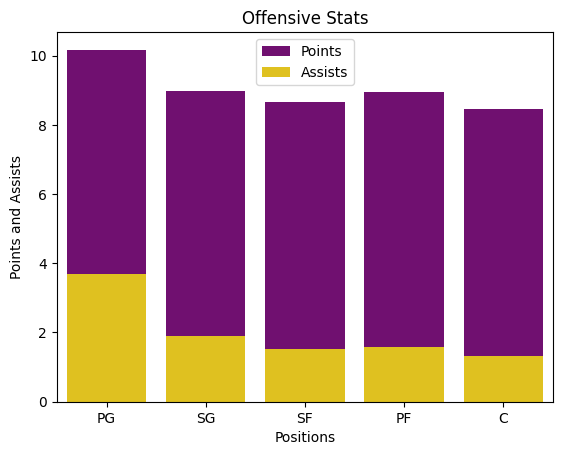

In [11]:
ax = sns.barplot(x=offense_means.index, y=offense_means.PTS,color='Purple',label='Points')
sns.barplot(x=offense_means.index, y=offense_means.AST,color='Gold',label='Assists')

plt.title('Offensive Stats')
plt.xlabel('Positions')
plt.ylabel('Points and Assists')

ax.legend()
sns.move_legend(ax, 'upper center')

plt.show()

In [12]:
#sns.barplot(x=offense_means.index, y=offense_means.PTS)

In [13]:
usage = df.drop(df[df['MP'] < 30].index)
grouped = usage.groupby('Pos')
usage

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
9,Jarrett Allen,C,24.0,CLE,57.0,57.0,33.2,6.2,9.4,0.654,...,0.733,3.2,6.7,9.9,1.6,0.8,1.2,1.5,2.2,14.8
12,Giannis Antetokounmpo,PF,28.0,MIL,48.0,48.0,32.5,11.1,20.7,0.538,...,0.646,2.3,9.7,12.0,5.4,0.8,0.8,3.9,3.3,31.3
15,OG Anunoby,SF,25.0,TOR,48.0,48.0,35.8,6.1,13.4,0.453,...,0.825,1.4,3.9,5.4,2.0,2.0,0.8,2.1,3.0,16.4
20,Deandre Ayton,C,24.0,PHO,53.0,53.0,30.3,8.2,13.8,0.591,...,0.739,2.8,7.3,10.1,2.0,0.6,0.8,1.9,2.8,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Franz Wagner,SF,21.0,ORL,61.0,61.0,33.2,6.9,14.1,0.485,...,0.833,0.9,3.1,4.0,3.5,0.9,0.2,2.1,2.3,18.8
609,P.J. Washington,PF,24.0,CHO,60.0,60.0,32.9,5.8,13.0,0.444,...,0.748,1.0,3.7,4.8,2.4,0.9,1.1,1.4,2.7,15.3
625,Andrew Wiggins,SF,27.0,GSW,37.0,37.0,32.2,6.8,14.3,0.473,...,0.611,1.6,3.4,5.0,2.3,1.2,0.8,1.3,2.9,17.1
637,Zion Williamson,PF,22.0,NOP,29.0,29.0,33.0,9.8,16.2,0.608,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0


In [14]:
#Do certain positions play more defense or offense? - Higer Usage Players
defense_means = pd.DataFrame()
new_order = ['PG','SG','SF', 'PF','C']
defense_means = defense_means.reindex(new_order)
defense_means['BLK']= round(grouped['BLK'].mean(),2)
defense_means['STL'] = round(grouped['STL'].mean(),2)
defense_means

,BLK,STL
PG,0.40,1.16
SG,0.33,1.00
SF,0.42,1.07
PF,0.73,0.84
C,1.15,0.86


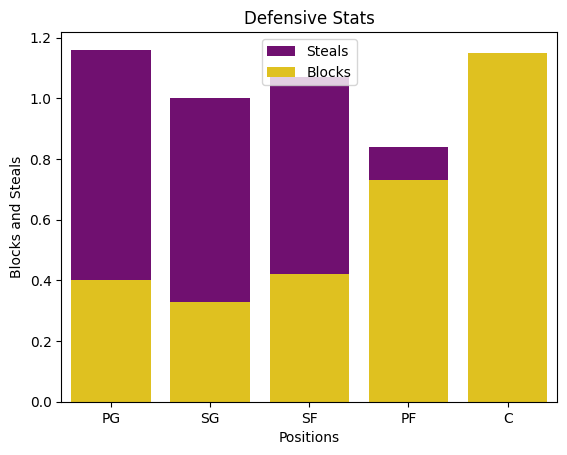

In [15]:
ax = sns.barplot(x=defense_means.index, y=defense_means.STL,color='Purple',label='Steals')
sns.barplot(x=defense_means.index, y=defense_means.BLK,color='Gold',label='Blocks')

plt.title('Defensive Stats')
plt.xlabel('Positions')
plt.ylabel('Blocks and Steals')

ax.legend()
sns.move_legend(ax, 'upper center')

plt.show()

In [16]:
#Do certain positions play more defense or offense? - Higer Usage Players
offense_means = pd.DataFrame()
new_order = ['PG','SG','SF', 'PF','C']
offense_means = offense_means.reindex(new_order)
offense_means['PTS'] = round(grouped['PTS'].mean(),2)
offense_means['AST'] = round(grouped['AST'].mean(),2)
offense_means

,PTS,AST
PG,21.85,6.94
SG,19.77,4.01
SF,18.13,3.07
PF,18.83,3.47
C,20.02,3.62


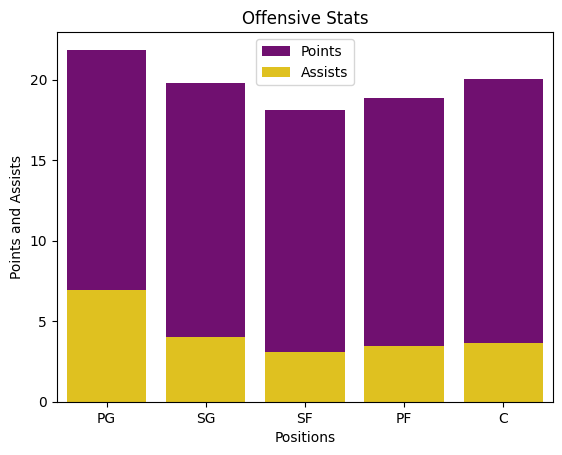

In [17]:
ax = sns.barplot(x=offense_means.index, y=offense_means.PTS,color='Purple',label='Points')
sns.barplot(x=offense_means.index, y=offense_means.AST,color='Gold',label='Assists')

plt.title('Offensive Stats')
plt.xlabel('Positions')
plt.ylabel('Points and Assists')

ax.legend()
sns.move_legend(ax, 'upper center')

plt.show()

In [18]:
lowusage = df.drop(df[df['MP'] > 15].index)
grouped = lowusage.groupby('Pos')
lowusage
#usage

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,Nickeil Alexander-Walker,SG,24.0,TOT,40.0,3.0,14.5,2.3,4.9,0.479,...,0.675,0.3,1.4,1.7,2.0,0.6,0.4,1.2,1.5,6.3
13,Thanasis Antetokounmpo,SF,30.0,MIL,26.0,0.0,4.1,0.2,0.8,0.250,...,0.500,0.3,0.7,1.0,0.2,0.1,0.1,0.3,0.5,0.5
16,Ryan Arcidiacono,PG,28.0,TOT,14.0,1.0,4.9,0.3,1.0,0.286,...,NaN,0.0,0.7,0.7,0.6,0.1,0.0,0.2,0.4,0.9
21,Udoka Azubuike,C,23.0,UTA,25.0,0.0,5.8,0.9,1.1,0.852,...,0.333,0.6,1.6,2.2,0.2,0.2,0.2,0.4,0.5,1.9
23,Patrick Baldwin Jr.,SF,20.0,GSW,19.0,0.0,8.8,1.9,4.2,0.450,...,0.667,0.1,1.5,1.5,0.2,0.3,0.1,0.4,0.4,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Joe Wieskamp,SF,23.0,TOR,3.0,0.0,8.0,1.0,2.7,0.375,...,NaN,0.0,0.7,0.7,0.3,0.0,0.0,0.3,0.3,3.0
626,Alondes Williams,SG,23.0,BRK,1.0,0.0,5.0,0.0,0.0,NaN,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
634,Vince Williams Jr.,SG,22.0,MEM,9.0,0.0,5.4,0.3,1.4,0.231,...,NaN,0.2,0.6,0.8,0.3,0.4,0.1,0.1,0.7,0.8
639,James Wiseman,C,21.0,TOT,25.0,2.0,14.2,3.3,5.3,0.617,...,0.674,1.0,3.2,4.2,0.6,0.1,0.3,0.8,2.0,7.9


In [19]:
offense_means = pd.DataFrame()
new_order = ['PG','SG','SF', 'PF','C']
offense_means = offense_means.reindex(new_order)
offense_means['PTS'] = round(grouped['PTS'].mean(),2)
offense_means['AST'] = round(grouped['AST'].mean(),2)
offense_means

,PTS,AST
PG,2.95,1.19
SG,3.20,0.64
SF,2.81,0.51
PF,3.18,0.49
C,3.59,0.53


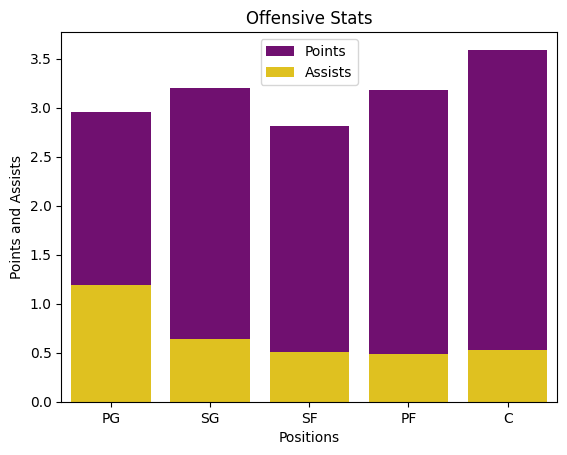

In [20]:
ax = sns.barplot(x=offense_means.index, y=offense_means.PTS,color='Purple',label='Points')
sns.barplot(x=offense_means.index, y=offense_means.AST,color='Gold',label='Assists')

plt.title('Offensive Stats')
plt.xlabel('Positions')
plt.ylabel('Points and Assists')

ax.legend()
sns.move_legend(ax, 'upper center')

plt.show()

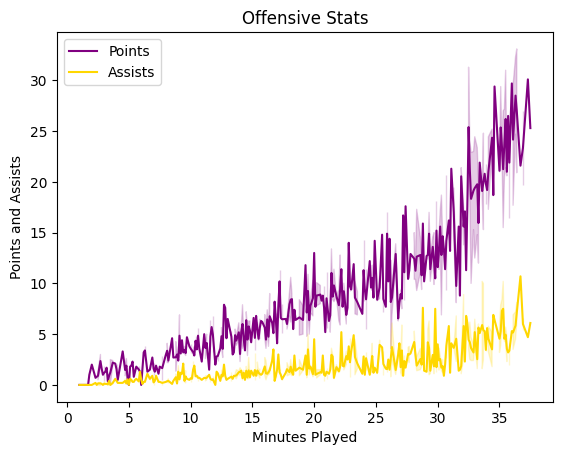

In [21]:
#Correlation between time playing and stats achieved
ax = sns.lineplot( x = "MP",y = "PTS",data = df,color='Purple',label='Points');
sns.lineplot( x = "MP",y = "AST",data = df,color='Gold',ax=ax,label='Assists');

plt.title('Offensive Stats')
plt.xlabel('Minutes Played')
plt.ylabel('Points and Assists')

plt.show()

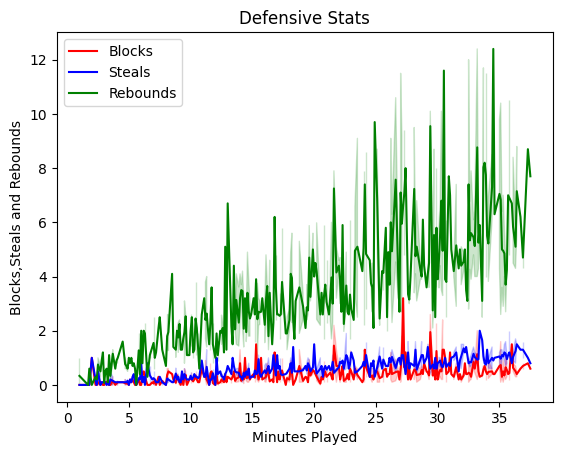

In [22]:
ax = sns.lineplot( x = "MP",y = "BLK",data = df,color='Red',label='Blocks');
sns.lineplot( x = "MP",y = "STL",data = df,color='Blue',ax=ax,label='Steals');
sns.lineplot( x = "MP",y = "TRB",data = df,color='Green',ax=ax,label='Rebounds');

plt.title('Defensive Stats')
plt.xlabel('Minutes Played')
plt.ylabel('Blocks,Steals and Rebounds')

plt.show()

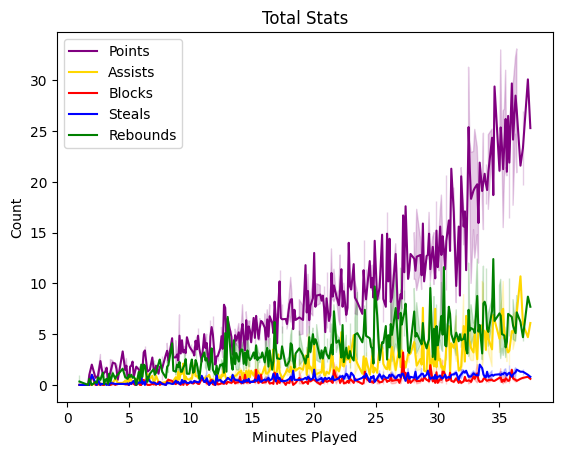

In [23]:
ax = sns.lineplot( x = "MP",y = "PTS",data = df,color='Purple',label='Points');
sns.lineplot( x = "MP",y = "AST",data = df,color='Gold',ax=ax,label='Assists');
sns.lineplot( x = "MP",y = "BLK",data = df,color='Red',ax=ax,label='Blocks');
sns.lineplot( x = "MP",y = "STL",data = df,color='Blue',ax=ax,label='Steals');
sns.lineplot( x = "MP",y = "TRB",data = df,color='Green',ax=ax,label='Rebounds');

plt.title('Total Stats')
plt.xlabel('Minutes Played')
plt.ylabel('Count')

plt.show()

In [24]:
starset = df[df['MP'] > 30]
#starset

In [25]:
grouped = round(starset.groupby('Pos').mean(),2)

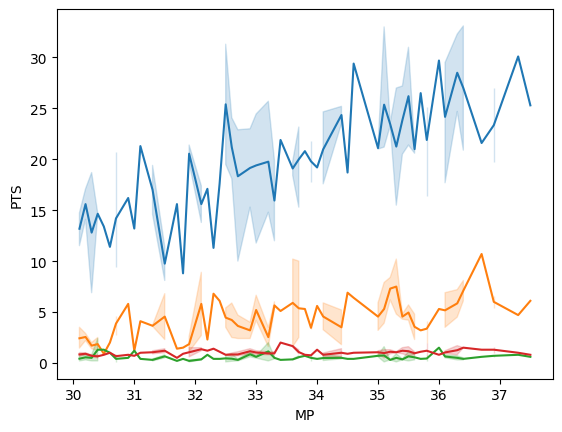

In [26]:
#What about for star players, do their numbers look different?
sns.lineplot( x = "MP",y = "PTS",data = starset);
sns.lineplot( x = "MP",y = "AST",data = starset);
sns.lineplot( x = "MP",y = "BLK",data = starset);
sns.lineplot( x = "MP",y = "STL",data = starset);

In [27]:
#defset = subset[(subset['BLK'] > 0.75) & (subset['STL'] > 0.75)]

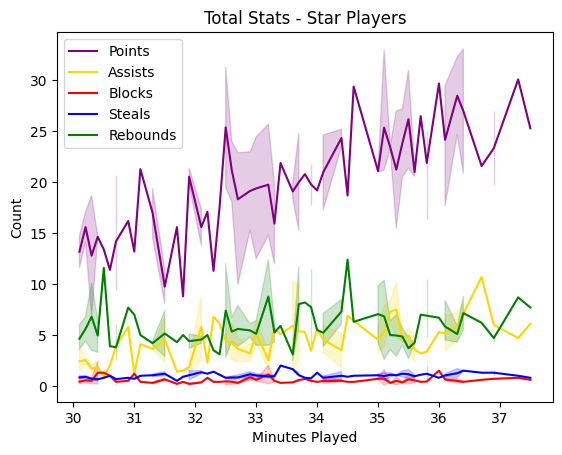

In [28]:
ax = sns.lineplot( x = "MP",y = "PTS",data = starset,color='Purple',label='Points');
sns.lineplot( x = "MP",y = "AST",data = starset,color='Gold',ax=ax,label='Assists');
sns.lineplot( x = "MP",y = "BLK",data = starset,color='Red',ax=ax,label='Blocks');
sns.lineplot( x = "MP",y = "STL",data = starset,color='Blue',ax=ax,label='Steals');
sns.lineplot( x = "MP",y = "TRB",data = starset,color='Green',ax=ax,label='Rebounds');

plt.title('Total Stats - Star Players')
plt.xlabel('Minutes Played')
plt.ylabel('Count')

plt.show()

In [29]:
roleset = df[df['MP'] < 15]
#roleset

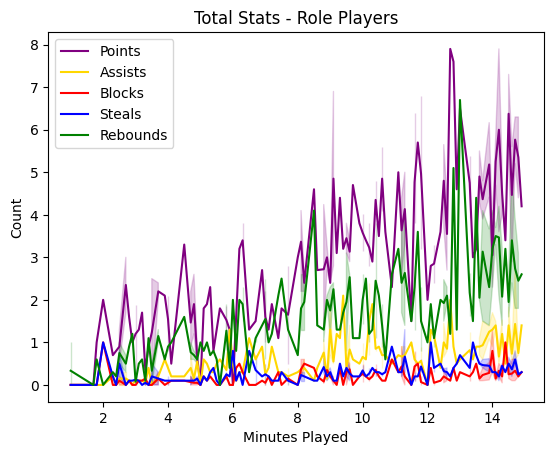

In [30]:
ax = sns.lineplot( x = "MP",y = "PTS",data = roleset,color='Purple',label='Points');
sns.lineplot( x = "MP",y = "AST",data = roleset,color='Gold',ax=ax,label='Assists');
sns.lineplot( x = "MP",y = "BLK",data = roleset,color='Red',ax=ax,label='Blocks');
sns.lineplot( x = "MP",y = "STL",data = roleset,color='Blue',ax=ax,label='Steals');
sns.lineplot( x = "MP",y = "TRB",data = roleset,color='Green',ax=ax,label='Rebounds');

plt.title('Total Stats - Role Players')
plt.xlabel('Minutes Played')
plt.ylabel('Count')

plt.show()

In [31]:
#What are the average stats of players who have recently been traded?
tradeset = df[df['Tm'].str.contains('TOT')]
tradeset

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,Nickeil Alexander-Walker,SG,24.0,TOT,40.0,3.0,14.5,2.3,4.9,0.479,...,0.675,0.3,1.4,1.7,2.0,0.6,0.4,1.2,1.5,6.3
16,Ryan Arcidiacono,PG,28.0,TOT,14.0,1.0,4.9,0.3,1.0,0.286,...,NaN,0.0,0.7,0.7,0.6,0.1,0.0,0.2,0.4,0.9
26,Mo Bamba,C,24.0,TOT,43.0,6.0,16.9,2.6,5.3,0.485,...,0.661,1.1,3.7,4.8,1.0,0.3,1.0,0.6,2.3,7.1
42,Malik Beasley,SG,26.0,TOT,60.0,16.0,26.6,4.8,12.2,0.396,...,0.787,0.5,3.1,3.5,1.7,0.9,0.1,1.1,1.5,13.4
47,Patrick Beverley,PG,34.0,TOT,47.0,47.0,26.8,2.1,5.3,0.398,...,0.764,0.6,2.6,3.2,2.6,0.9,0.6,0.9,2.7,6.3
50,Saddiq Bey,SF,23.0,TOT,56.0,32.0,28.6,4.6,11.3,0.407,...,0.863,1.1,3.5,4.6,1.5,0.9,0.2,1.0,1.6,14.5
55,Goga Bitadze,C,23.0,TOT,22.0,0.0,9.6,1.3,2.5,0.527,...,0.480,1.2,1.3,2.5,0.9,0.4,0.5,0.5,1.6,3.4
72,Mikal Bridges,SF,26.0,TOT,61.0,61.0,36.1,6.4,13.8,0.468,...,0.899,1.0,3.4,4.5,3.5,1.2,0.8,1.4,2.0,17.7
87,Thomas Bryant,C,25.0,TOT,47.0,25.0,20.2,4.4,6.9,0.640,...,0.739,1.6,4.9,6.4,0.6,0.3,0.6,0.7,1.8,11.1
116,Mike Conley,PG,35.0,TOT,48.0,47.0,29.8,3.5,8.7,0.406,...,0.812,0.4,2.0,2.5,7.5,1.0,0.2,1.7,2.1,10.5


In [32]:
rookieset = tradeset[tradeset['Age'] <= 25]
normalset = tradeset[(tradeset['Age'] <= 30) & (tradeset['Age'] > 25)]
veteranset = tradeset[tradeset['Age'] > 30]

In [33]:
rookies = len(rookieset)
normals = len(normalset)
veterans = len(veteranset)

data = [rookies,normals,veterans]

length = int(len(tradeset))

word = ['Rookies (under 25) {} - {:0.1f}%'.format(rookies,rookies/length*100),
        'Normals (under 30 over 25) {} - {:0.1f}%'.format(normals,normals/length*100),
        'Veterans (over 30) {} - {:0.1f}%'.format(veterans,veterans/length*100)
       ]

In [34]:
print(rookies)

23


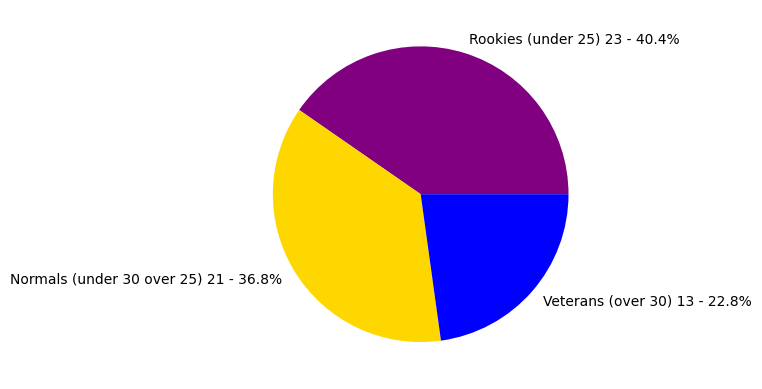

In [35]:
fig = plt.pie(data,labels = word,colors = ['Purple','Gold','Blue'])

In [36]:
rs = round(rookieset['MP'].sum(),2)
rr = rs/rookies
rr

15.134782608695653

In [37]:
ns = round(normalset['MP'].sum(),2)
nr = ns/normals
nr

21.20952380952381

In [38]:
vs = round(veteranset['MP'].sum(),2)
vr = vs/veterans
vr

21.73846153846154

In [39]:
ts = rs + ns + vs
ts

1076.1

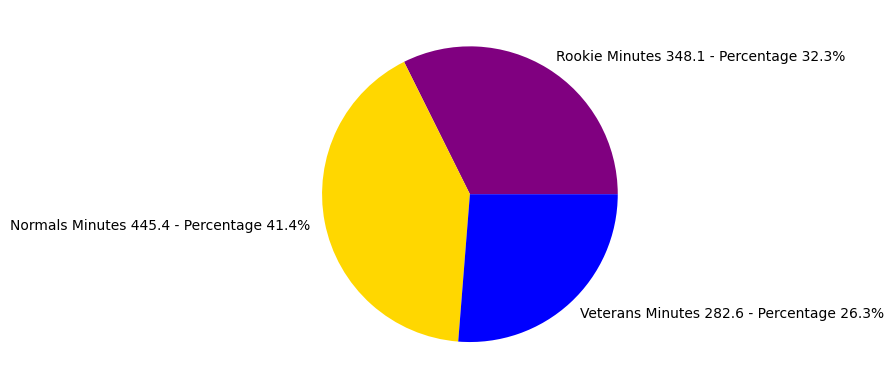

In [40]:
data = [rs,ns,vs]

word = ['Rookie Minutes {} - Percentage {:0.1f}%'.format(rs,rs/ts*100),
        'Normals Minutes {} - Percentage {:0.1f}%'.format(ns,ns/ts*100),
        'Veterans Minutes {} - Percentage {:0.1f}%'.format(vs,vs/ts*100)
       ]

fig = plt.pie(data,labels = word,colors = ['Purple','Gold','Blue'])

In [41]:
collective = rookies+normals+veterans

In [42]:
fs = ts/collective
print(fs)
master = [['rookie', rs,fs,rr], ['normal', ns,fs,nr],['veteran', vs,fs,vr]]
data= pd.DataFrame(master, columns = ['Status', 'Amount','Average Utilization','Actual Utilization'])
data

18.878947368421052


,Status,Amount,Average Utilization,Actual Utilization
0,rookie,348.1,18.878947,15.134783
1,normal,445.4,18.878947,21.209524
2,veteran,282.6,18.878947,21.738462


Text(0, 0.5, 'Utilization (Minutes Played)')

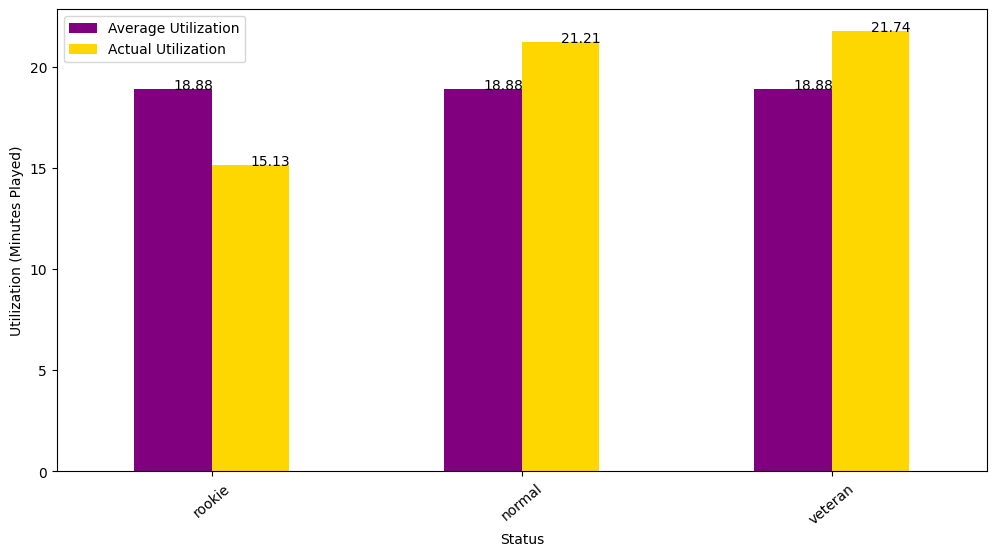

In [43]:
#df.plot.bar(x = 'Status', y = ['Average Utilization','Actual Utilization'], rot = 40)
fig, ax = plt.subplots(figsize=(12,6))
data.plot.bar(x = 'Status', y = ['Average Utilization', 'Actual Utilization'], rot = 40, ax = ax, color=['purple', 'gold'])
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
ax.set_xlabel('Status')
ax.set_ylabel('Utilization (Minutes Played)')

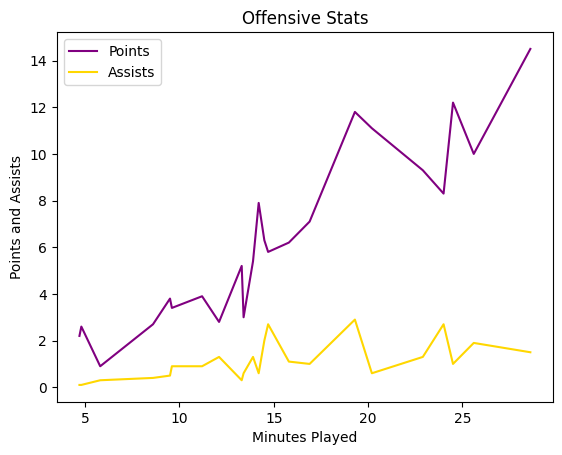

In [44]:
ax = sns.lineplot( x = "MP",y = "PTS",data = rookieset,color='Purple',label='Points');
sns.lineplot( x = "MP",y = "AST",data = rookieset,color='Gold',ax=ax,label='Assists');

plt.title('Offensive Stats')
plt.xlabel('Minutes Played')
plt.ylabel('Points and Assists')

plt.show()

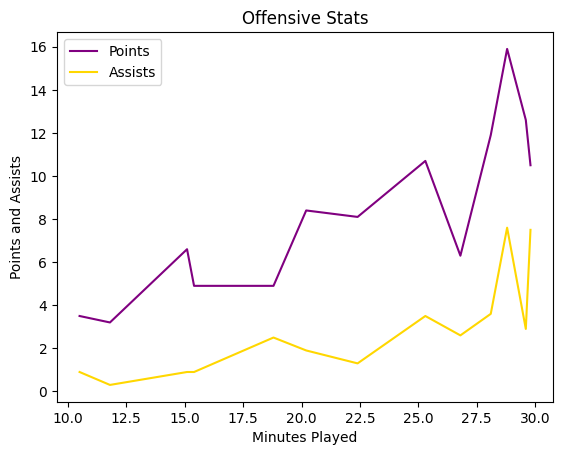

In [45]:
ax = sns.lineplot( x = "MP",y = "PTS",data = veteranset,color='Purple',label='Points');
sns.lineplot( x = "MP",y = "AST",data = veteranset,color='Gold',ax=ax,label='Assists');

plt.title('Offensive Stats')
plt.xlabel('Minutes Played')
plt.ylabel('Points and Assists')

plt.show()

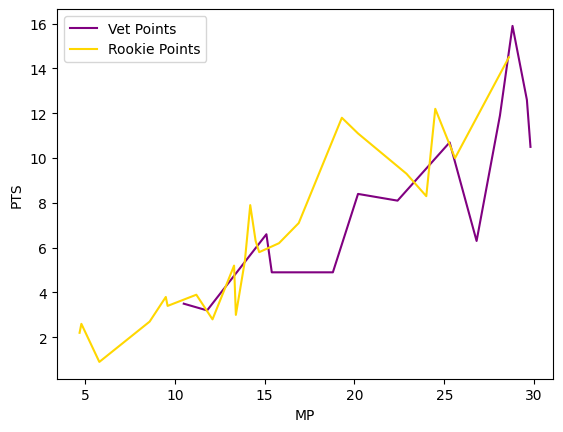

In [46]:
ax = sns.lineplot( x = "MP",y = "PTS",data = veteranset,color='Purple',label='Vet Points');
sns.lineplot( x = "MP",y = "PTS",data = rookieset,color='Gold',label='Rookie Points',ax=ax);

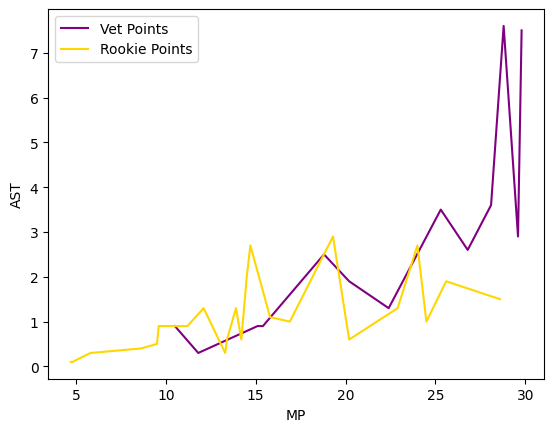

In [47]:
ax = sns.lineplot( x = "MP",y = "AST",data = veteranset,color='Purple',label='Vet Points');
sns.lineplot( x = "MP",y = "AST",data = rookieset,color='Gold',label='Rookie Points',ax=ax);

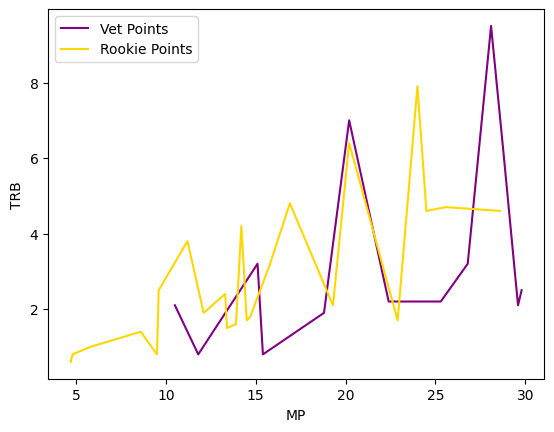

In [48]:
ax = sns.lineplot( x = "MP",y = "TRB",data = veteranset,color='Purple',label='Vet Points');
sns.lineplot( x = "MP",y = "TRB",data = rookieset,color='Gold',label='Rookie Points',ax=ax);

In [49]:
#Relationship between age and average stats
#sns.jointplot(data=df,x='Age',y='PTS',kind='hex')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,McKinley Wright IV,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,Thaddeus Young,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,Trae Young,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,Cody Zeller,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


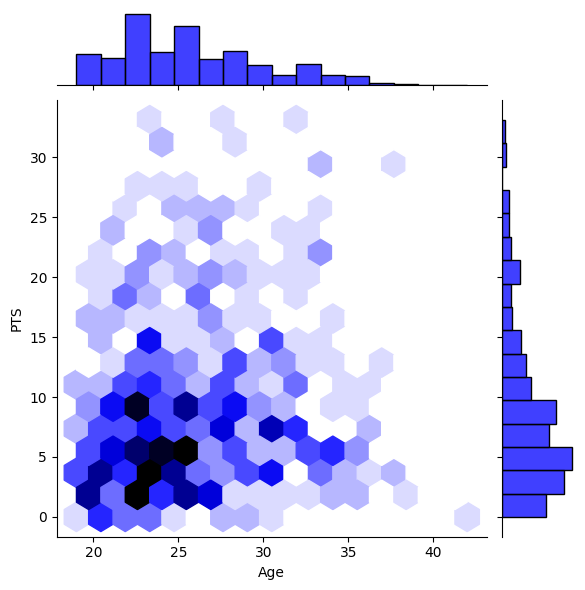

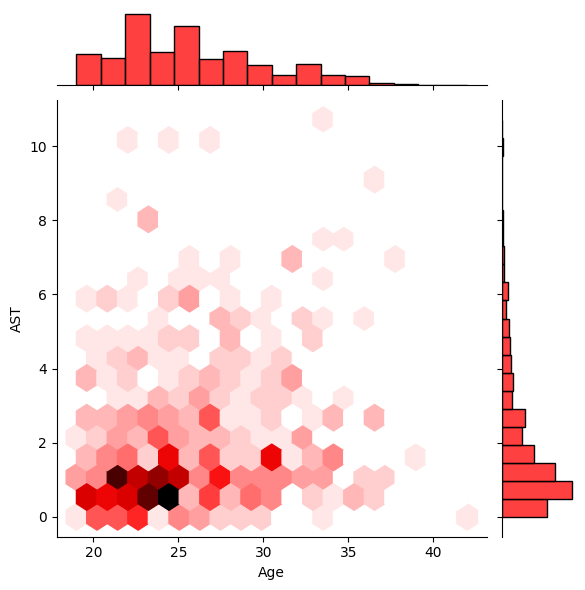

In [50]:
sns.jointplot( x = "Age",y = "PTS",data = df,color='Blue',label='Points',kind='hex');
sns.jointplot(data=df,x='Age',y='AST',kind='hex',label='Assists',color='Red')

plt.show()

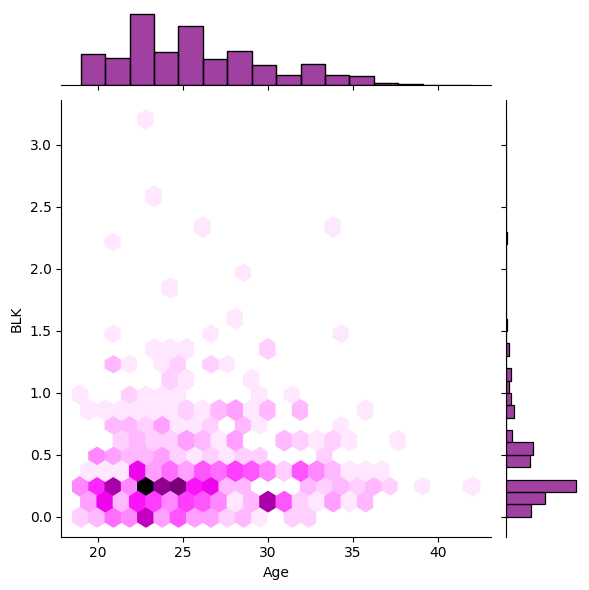

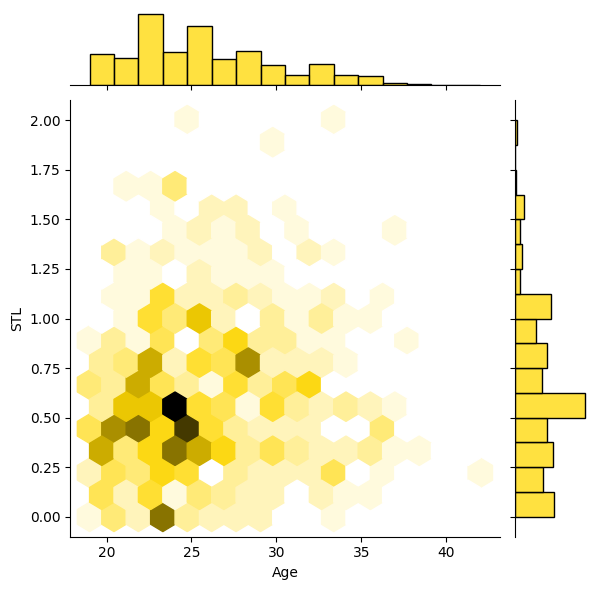

In [51]:
sns.jointplot(data=df,x='Age',y='BLK',kind='hex',label='Blocks',color='Purple')
sns.jointplot(data=df,x='Age',y='STL',kind='hex',label='Blocks',color='Gold')

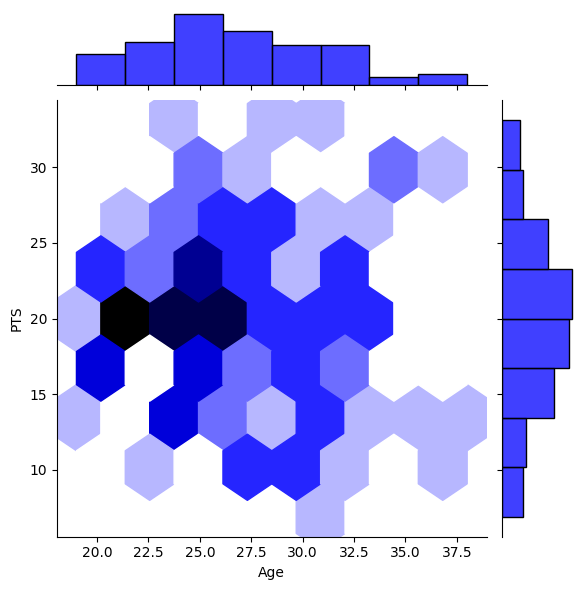

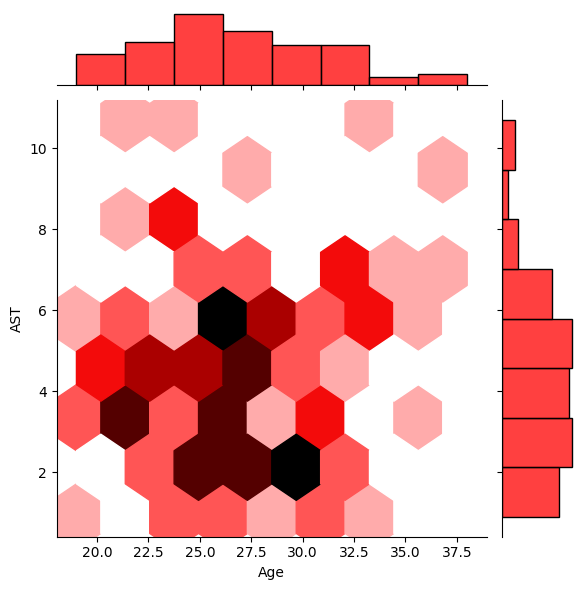

In [52]:
sns.jointplot( x = "Age",y = "PTS",data = starset,color='Blue',label='Points',kind='hex');
sns.jointplot(data=starset,x='Age',y='AST',kind='hex',label='Assists',color='Red')

plt.show()

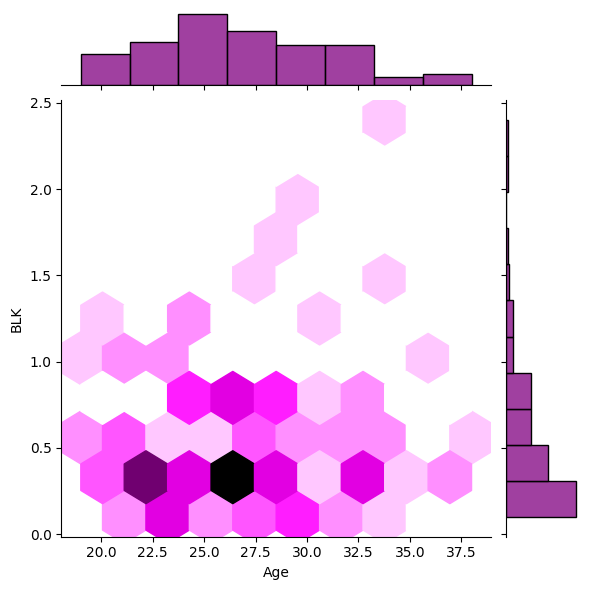

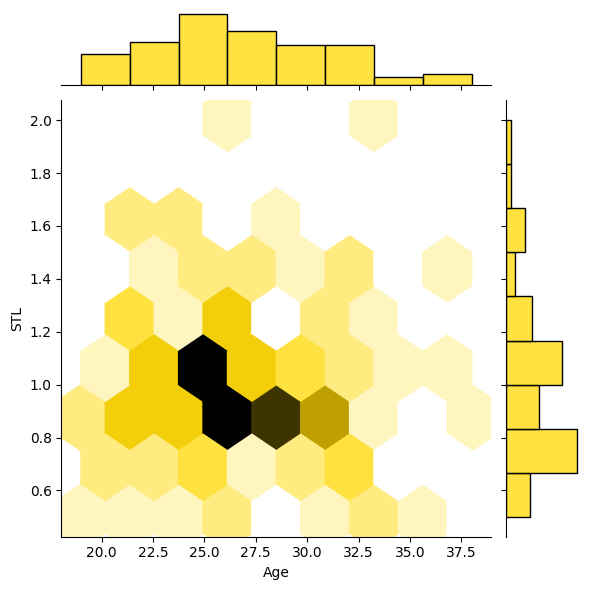

In [53]:
sns.jointplot(data=starset,x='Age',y='BLK',kind='hex',label='Blocks',color='Purple')
sns.jointplot(data=starset,x='Age',y='STL',kind='hex',label='Blocks',color='Gold')

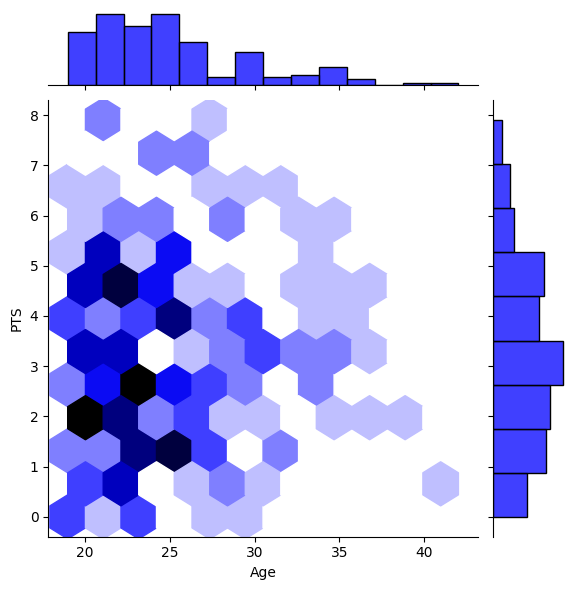

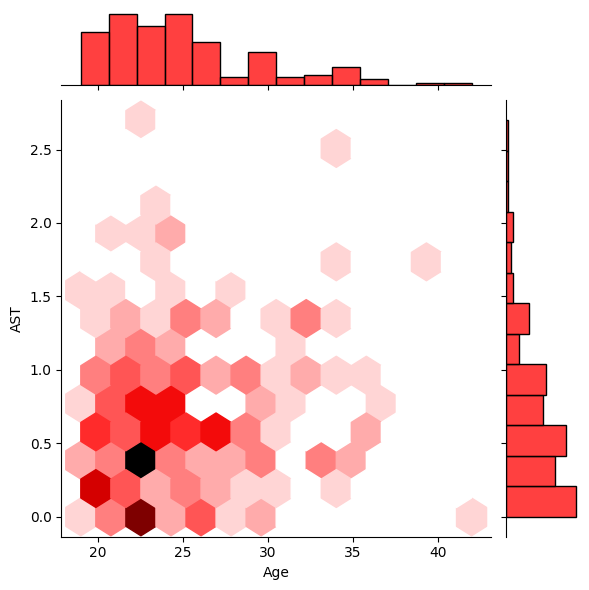

In [54]:
sns.jointplot( x = "Age",y = "PTS",data = roleset,color='Blue',label='Points',kind='hex');
sns.jointplot(data=roleset,x='Age',y='AST',kind='hex',label='Assists',color='Red')

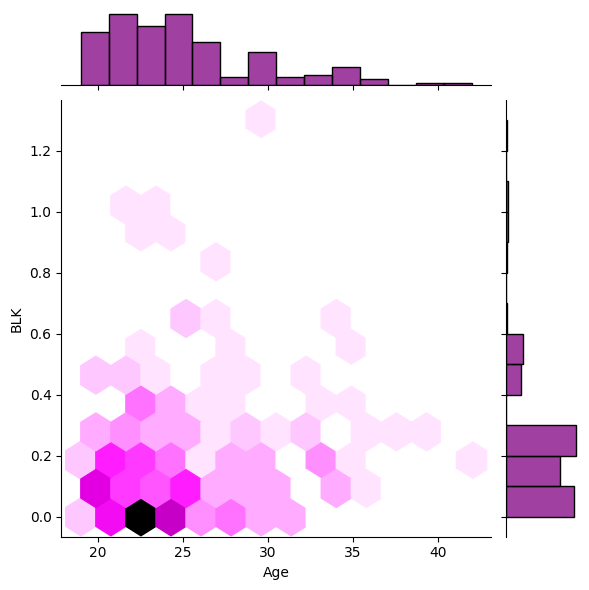

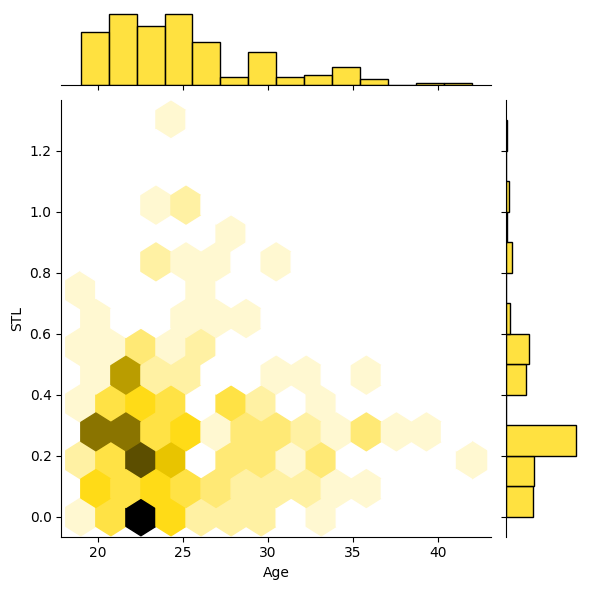

In [55]:
sns.jointplot(data=roleset,x='Age',y='BLK',kind='hex',label='Blocks',color='Purple')
sns.jointplot(data=roleset,x='Age',y='STL',kind='hex',label='Blocks',color='Gold')

In [56]:
#grouped = df.groupby('Tm').mean()

In [57]:
data = df.groupby(["Tm"], as_index=False).mean()
datasum = df.groupby(["Tm"], as_index=False).sum()

In [58]:
max_age = data['Age'].idxmax()

max_age_row = data.loc[max_age]

In [59]:
min_age = data['Age'].idxmin()

min_age_row = data.loc[min_age]

In [60]:
records = pd.read_csv("records.csv")

In [61]:
merged_df = pd.merge(data, records, on='Tm', how='outer')
merged_df
merged_df_sum = pd.merge(datasum, records, on='Tm', how='outer')
merged_df_sum

,Tm,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,win,loss
0,ATL,338.0,580.0,303.0,299.5,53.5,112.6,6.558,12.4,36.0,...,41.8,55.4,29.7,8.9,5.7,15.2,23.2,140.9,29.0,30.0
1,BOS,430.0,640.0,309.0,315.9,52.2,109.3,7.517,18.8,50.7,...,47.0,61.9,32.8,8.0,7.0,17.0,26.1,144.1,42.0,17.0
2,BRK,352.0,508.0,236.0,257.6,42.7,83.6,5.988,11.8,29.8,...,35.4,43.6,27.3,7.3,7.1,17.1,25.3,114.8,34.0,24.0
3,CHI,425.0,619.0,303.0,291.6,48.8,101.4,7.107,11.9,33.5,...,40.7,51.5,28.2,8.9,5.3,15.4,23.6,131.1,26.0,33.0
4,CHO,335.0,519.0,238.0,309.6,53.0,121.2,6.260,14.7,45.8,...,39.6,52.7,32.4,10.8,6.0,16.7,25.7,143.1,17.0,43.0
5,CLE,367.0,601.0,317.0,291.9,48.4,99.7,6.801,13.4,37.1,...,36.5,47.4,30.6,9.2,5.2,15.1,23.2,130.6,38.0,23.0
6,DAL,470.0,553.0,210.0,282.6,46.3,95.6,8.621,15.9,45.1,...,36.6,45.9,25.0,7.6,4.8,14.9,27.0,129.9,31.0,29.0
7,DEN,375.0,597.0,308.0,281.2,51.9,98.7,7.368,12.9,32.8,...,39.4,51.7,33.1,8.2,5.5,16.5,22.6,135.3,41.0,18.0
8,DET,421.0,541.0,277.0,313.9,50.7,112.9,7.231,12.8,39.1,...,41.3,55.2,30.4,9.9,6.4,18.4,31.2,140.4,15.0,44.0
9,GSW,401.0,606.0,305.0,325.2,57.1,119.8,7.428,23.4,59.9,...,45.0,57.2,39.1,9.6,4.9,22.4,29.4,157.4,29.0,29.0


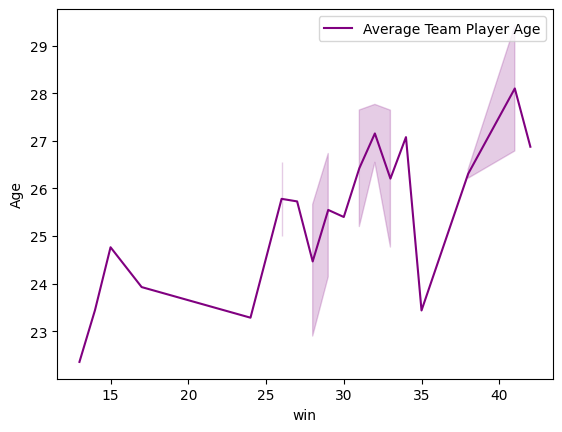

In [62]:
ax = sns.lineplot( x = "win",y = "Age",data = merged_df,color='Purple',label='Average Team Player Age')
#sns.lineplot( x = "win",y = "MP",data = merged_df,color='Gold',label='Minutes Played',ax=ax);

<Axes: xlabel='win', ylabel='MP'>

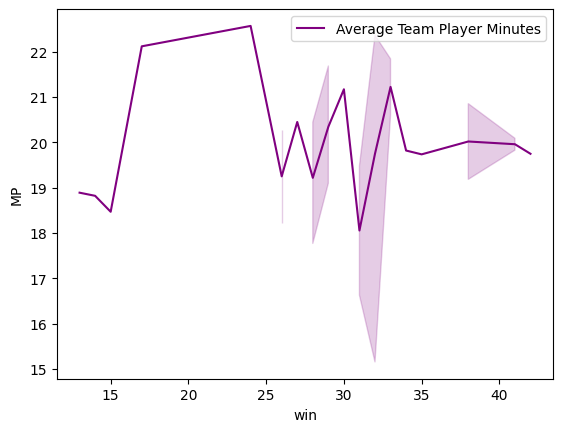

In [63]:
sns.lineplot( x = "win",y = "MP",data = merged_df,color='Purple',label='Average Team Player Minutes')

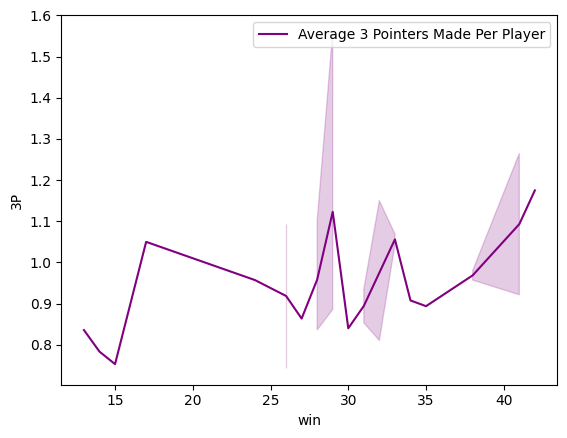

In [64]:
ax = sns.lineplot( x = "win",y = "3P",data = merged_df,color='Purple',label='Average 3 Pointers Made Per Player')

<Axes: xlabel='win', ylabel='3P'>

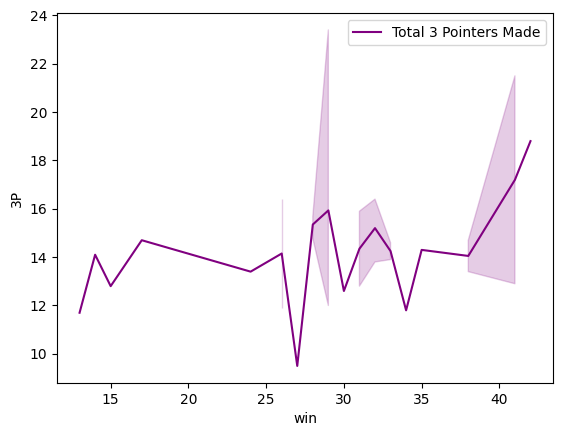

In [65]:
sns.lineplot( x = "win",y = "3P",data = merged_df_sum,color='Purple',label='Total 3 Pointers Made')

<Axes: xlabel='win', ylabel='FGP'>

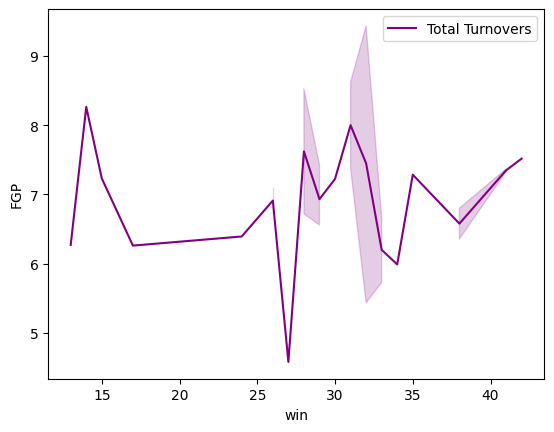

In [66]:
sns.lineplot( x = "win",y = "FGP",data = merged_df_sum,color='Purple',label='Total Turnovers')

<Axes: xlabel='win', ylabel='BLK'>

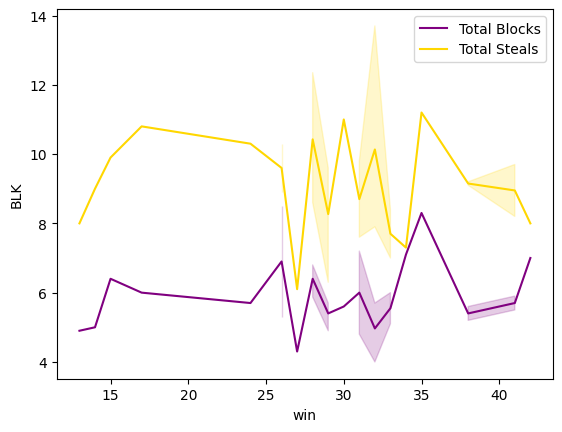

In [67]:
ax = sns.lineplot( x = "win",y = "BLK",data = merged_df_sum,color='Purple',label='Total Blocks')
sns.lineplot( x = "win",y = "STL",data = merged_df_sum,color='Gold',label='Total Steals')


<Axes: xlabel='win', ylabel='FGA'>

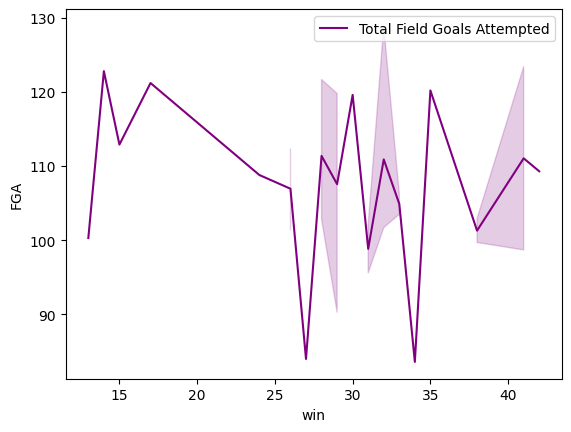

In [68]:
sns.lineplot( x = "win",y = "FGA",data = merged_df_sum,color='Purple',label='Total Field Goals Attempted')

In [69]:
#mask = df['B'].isin([2])
#result = df[mask]

In [70]:
#defense_means = pd.DataFrame()
#new_order = ['PG','SG','SF', 'PF','C']
#defense_means = defense_means.reindex(new_order)
#defense_means['BLK']= round(grouped['BLK'].mean(),2)
#defense_means['STL'] = round(grouped['STL'].mean(),2)
#defense_means